In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv' , encoding='ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4189,ham,"Sorry, I'll call later",NaN,NaN,NaN
491,spam,Congrats! 1 year special cinema pass for 2 is ...,NaN,NaN,NaN
2037,ham,Oh sorry please its over,NaN,NaN,NaN
3644,spam,wamma get laid?want real doggin locations sent...,NaN,NaN,NaN
976,ham,Ok i shall talk to him,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
# 1. Data Cleaning
# 2. EDA (exploratory data analysis)
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

Data Cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , axis=1 , inplace=True)


In [7]:
df.rename(columns={'v1':'target' , 'v2':'text'} , inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [9]:
df['target']= encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

EDA


In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1b17b2a9410>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

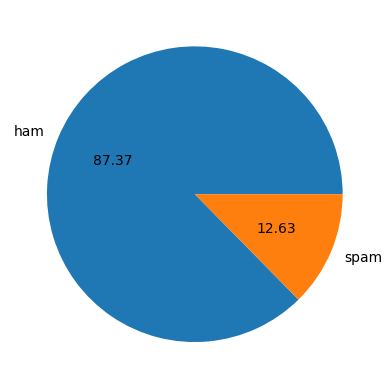

In [15]:
plt.pie(df['target'].value_counts() , labels=['ham' , 'spam'] , autopct="%0.2f")

In [16]:
# Data Is Imbalanced

import nltk
# nltk -: natural language tool kit

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df["num_characters"] = df['text'].apply(len)

C:\Users\siddh\AppData\Local\Temp\ipykernel_1868\2073730758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"] = df['text'].apply(len)


In [19]:
#  num of words
df["num_words"] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\siddh\AppData\Local\Temp\ipykernel_1868\3349329770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [20]:
df.head(4)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13


In [21]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\siddh\AppData\Local\Temp\ipykernel_1868\589552786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [22]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[['num_characters' ,'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# ham messages
df[df['target'] == 0][['num_characters' ,'num_words' , 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#  spam messages
df[df['target'] == 1][['num_characters' ,'num_words' , 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

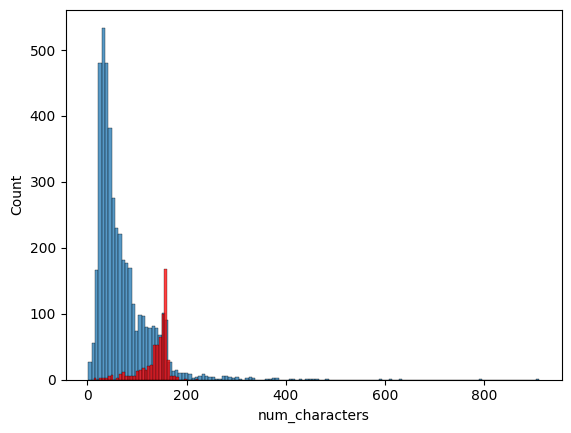

In [27]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'] , color="red")

<Axes: xlabel='num_words', ylabel='Count'>

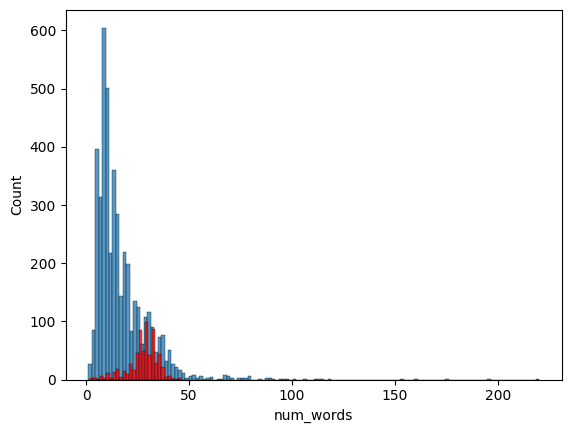

In [28]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'] , color="red")

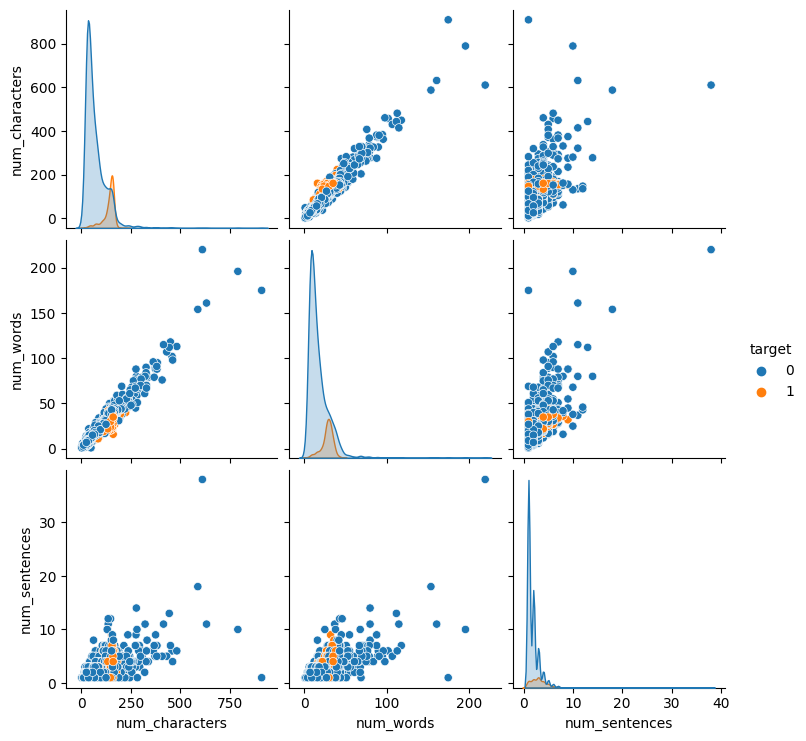

In [29]:
sns.pairplot(df , hue="target")

In [30]:
df1 = df[["target" , "num_characters" , "num_words" , "num_sentences"]]
df1.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

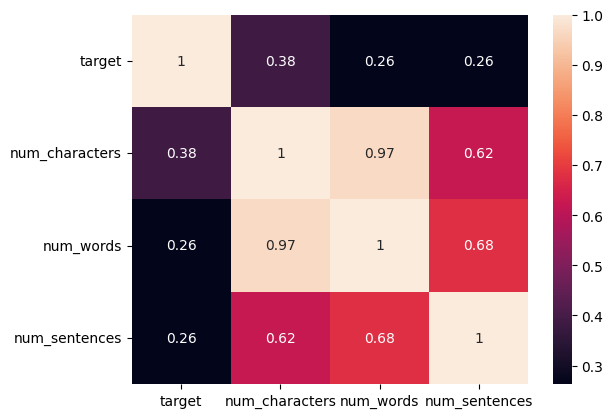

In [31]:
sns.heatmap(df1.corr() , annot=True)

3. Data Preprocessing


In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [34]:
# Lower Case
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y  = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
           y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [35]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [36]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [37]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\siddh\AppData\Local\Temp\ipykernel_1868\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')

In [39]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

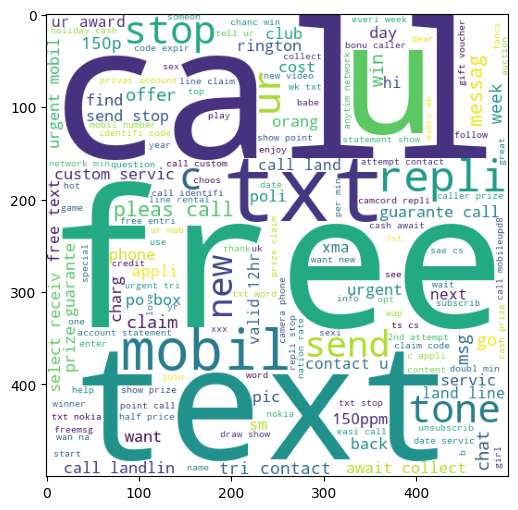

In [40]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [41]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

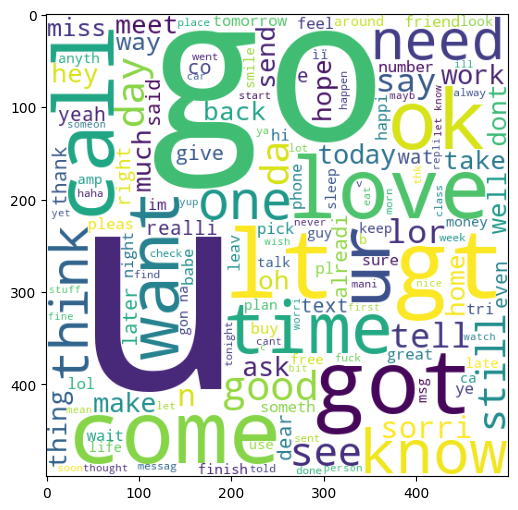

In [42]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [43]:
# .tolist coverts dataframe to a list
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

len(spam_corpus)

9939

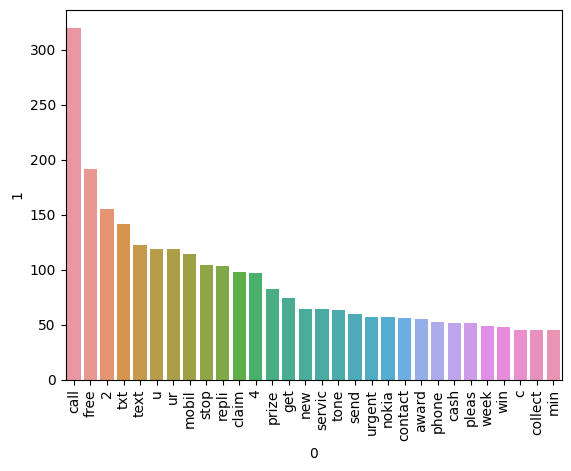

In [44]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1] )
plt.xticks(rotation = "vertical")
plt.show()

In [45]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

len(ham_corpus)

35404

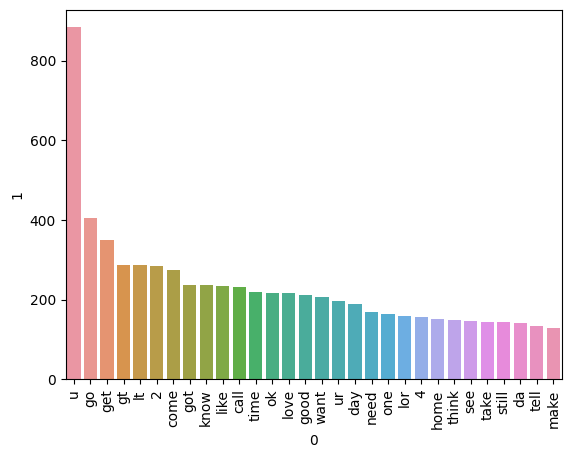

In [46]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1] )
plt.xticks(rotation = "vertical")
plt.show()

4. Model Building


In [47]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [48]:
X = tfidf.fit_transform( df['transformed_text']).toarray()
# X = cv.fit_transform( df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [49]:
y= df['target'].values

In [50]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [55]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)

In [56]:
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [57]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [58]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [60]:
svc = SVC(kernel='sigmoid' , gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear' , penalty='l1')
rfc = RandomForestClassifier(n_estimators=50 ,  random_state=2)
abc = AdaBoostClassifier(n_estimators=50 , random_state=2)
bc = BaggingClassifier(n_estimators=50 , random_state=2)
etc= ExtraTreesClassifier(n_estimators=50 , random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50 , random_state=2)
xgb = XGBClassifier(n_estimators=50 , random_state=2)

In [61]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [62]:
# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
    
#     return accuracy,precision


In [63]:
# train_classifier(svc,X_train,y_train,X_test,y_test)

In [64]:
# accuracy_score = []
# precision_score = []

# for name,clf in clfs.items():
#     current_accuracy , current_precision = train_classifier(clf, X_train , X_test,y_train , y_test)
#     print("For ",name)
#     print("Accuracy - " , current_accuracy )
#     print("precision - " , current_precision )

#     accuracy_score.append(current_accuracy)
#     precision_score.append(current_precision)

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [66]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [67]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [68]:
from sklearn.metrics import mean_squared_error
y_pred = voting.predict(X_test)
## print("Accuracy",accuracy_score((y_test,y_pred)))
# print(mean_squared_error(y_test, y_pred))
## print("Precision",precision_score(y_test,y_pred))

In [ ]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))